In [1]:
import fastf1
import fastf1.plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
session = fastf1.get_session(2019, "Monza", "Q")
session.load()
leclerc_fast = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = leclerc_fast.get_car_data().add_distance()

req         WARNING 	DEFAULT CACHE ENABLED! (1.32 GB) /Users/emccauley6/Library/Caches/fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


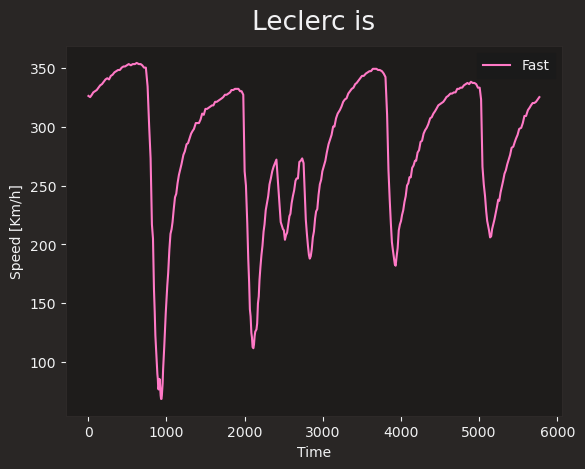

In [3]:
fastf1.plotting.setup_mpl(color_scheme="fastf1")
t_lec = lec_car_data["Distance"]
vCar_lec = lec_car_data['Speed']
fig, ax = plt.subplots()
ax.plot(t_lec, vCar_lec, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

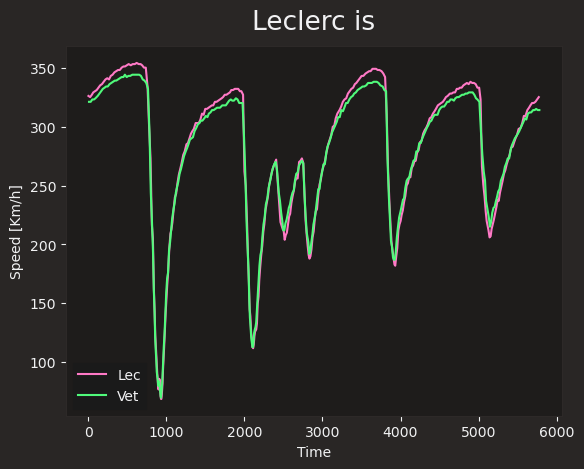

In [4]:
vettel_fast = session.laps.pick_drivers('VET').pick_fastest()
vet_car_data = vettel_fast.get_car_data().add_distance()
t_vet = vet_car_data['Distance']
vCar_vet = vet_car_data['Speed']
fig, ax1 = plt.subplots()
ax1.plot(t_lec, vCar_lec, label='Lec')
ax1.plot(t_vet, vCar_vet, label='Vet')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Leclerc is')
ax1.legend()
plt.show()

no data


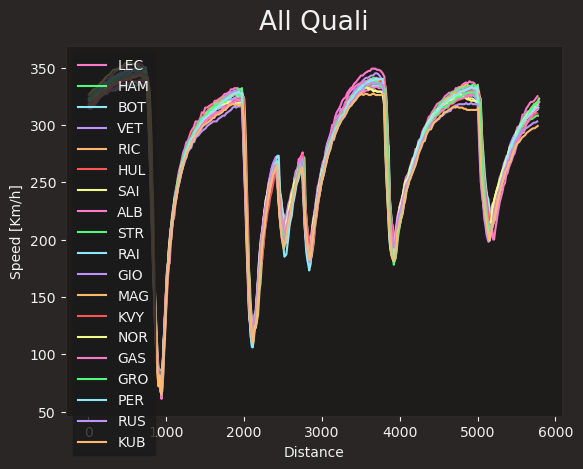

In [5]:
drivers = [session.get_driver(i)["Abbreviation"] for i in session.drivers]
session_results = {}
for driver in drivers:
    try:
        driver_fastest = session.laps.pick_drivers(driver).pick_fastest()
        driver_fastest = driver_fastest.get_car_data().add_distance()
        t = driver_fastest['Distance']
        vCar = driver_fastest["Speed"]
        session_results[driver] = [t, vCar]
    except:
        print("no data")
fig, ax1 = plt.subplots()
for key in session_results.keys():
    data = session_results[key]
    ax1.plot(data[0], data[1], label=key)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('All Quali')
ax1.legend()
plt.show()

In [6]:
session_bahrain_2024 = fastf1.get_session(2024, "Bahrain", "R")
session_bahrain_2024.load(telemetry=False, weather=False)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


req            INFO 	Using cached data for driver_info


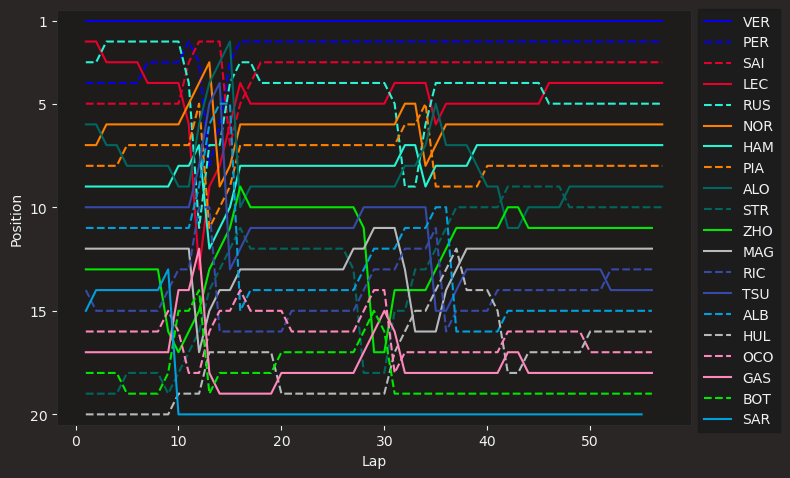

In [7]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in session_bahrain_2024.drivers:
    drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
    abb = drv_laps['Driver'].iloc[0]
    
    style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
    ax.plot(drv_laps['LapNumber'], drv_laps["Position"], label=abb, **style)
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

# try to map race lap times

In [8]:
session_bahrain_2024.laps.pick_drivers("VER")


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,False,Red Bull Racing,0 days 00:59:59.911000,NaT,12,1.0,False,,False,False
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,False,Red Bull Racing,0 days 01:01:37.489000,NaT,1,1.0,False,,False,True
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,False,Red Bull Racing,0 days 01:03:13.785000,NaT,1,1.0,False,,False,True
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,False,Red Bull Racing,0 days 01:04:50.538000,NaT,1,1.0,False,,False,True
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,False,Red Bull Racing,0 days 01:06:27.185000,NaT,1,1.0,False,,False,True
5,0 days 01:09:41.450000,VER,1,0 days 00:01:37.092000,6.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.187000,...,False,Red Bull Racing,0 days 01:08:04.358000,NaT,1,1.0,False,,False,True
6,0 days 01:11:18.488000,VER,1,0 days 00:01:37.038000,7.0,1.0,NaT,NaT,0 days 00:00:31.015000,0 days 00:00:42.118000,...,False,Red Bull Racing,0 days 01:09:41.450000,NaT,1,1.0,False,,False,True
7,0 days 01:12:55.512000,VER,1,0 days 00:01:37.024000,8.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.077000,...,False,Red Bull Racing,0 days 01:11:18.488000,NaT,1,1.0,False,,False,True
8,0 days 01:14:32.741000,VER,1,0 days 00:01:37.229000,9.0,1.0,NaT,NaT,0 days 00:00:31.100000,0 days 00:00:42.166000,...,False,Red Bull Racing,0 days 01:12:55.512000,NaT,1,1.0,False,,False,True
9,0 days 01:16:09.701000,VER,1,0 days 00:01:36.960000,10.0,1.0,NaT,NaT,0 days 00:00:30.986000,0 days 00:00:42.009000,...,False,Red Bull Racing,0 days 01:14:32.741000,NaT,12,1.0,False,,False,True


/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/1400241906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()


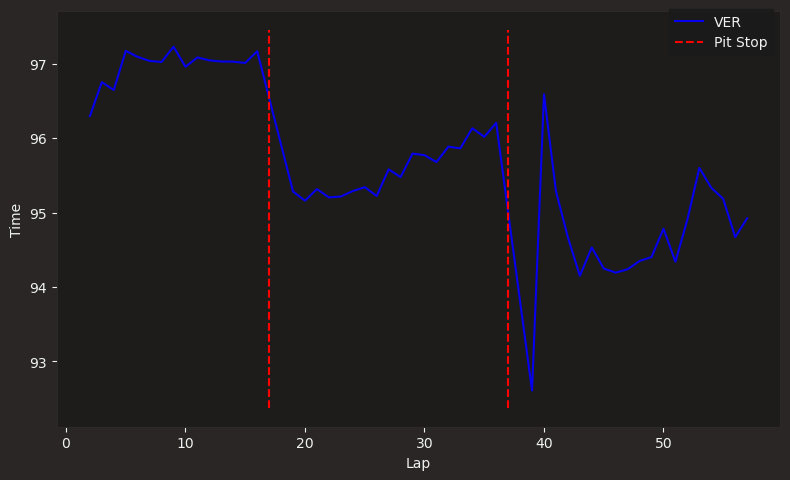

In [9]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
drv = "VER"
drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
abb = drv_laps['Driver'].iloc[0]

accurate_laps = drv_laps[drv_laps['IsAccurate'] == True]
pit_laps = drv_laps[drv_laps['PitInTime'].notnull()]['LapNumber']

style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
ax.plot(accurate_laps['LapNumber'], accurate_laps["LapTimeSeconds"], label=abb, **style)

ymin, ymax = ax.get_ylim()
ax.vlines(x=pit_laps, ymin=ymin, ymax=ymax, color='red', lw=1.5, linestyle='--', label='Pit Stop')
ax.set_xlabel('Lap')
ax.set_ylabel('Time')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/2594913063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/2594913063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/2594913063.py:6: SettingWithCopyWarning: 
A value is tr

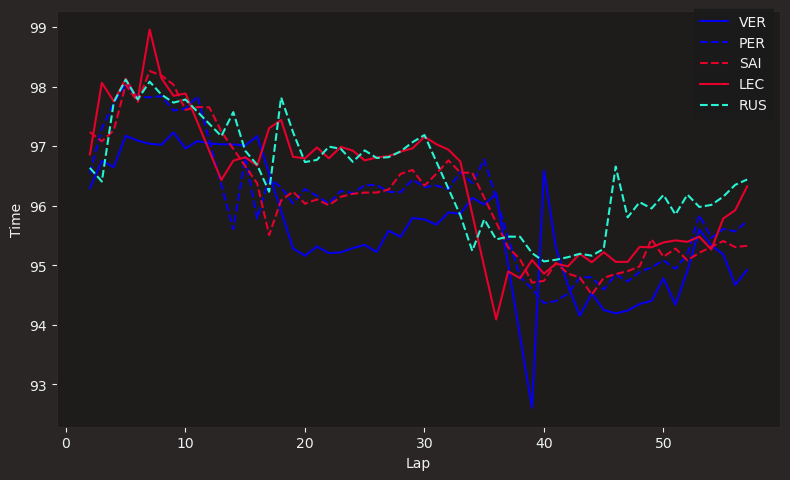

In [10]:
# all drivers just out of curiosity

fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in session_bahrain_2024.drivers[:5]:
    drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
    drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
    abb = drv_laps['Driver'].iloc[0]

    pit_laps = drv_laps[drv_laps['PitInTime'].notnull()]['LapNumber']
    accurate_laps = drv_laps[drv_laps['IsAccurate']]
    style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
    ax.plot(accurate_laps['LapNumber'], accurate_laps["LapTimeSeconds"], label=abb, **style)

    #ymin, ymax = ax.get_ylim()
    #ax.vlines(x=pit_laps, ymin=ymin, ymax=ymax, color='red', lw=1.5, linestyle='--', label='Pit Stop')
ax.set_xlabel('Lap')
ax.set_ylabel('Time')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
req            INFO 	Using cached data for driver_info


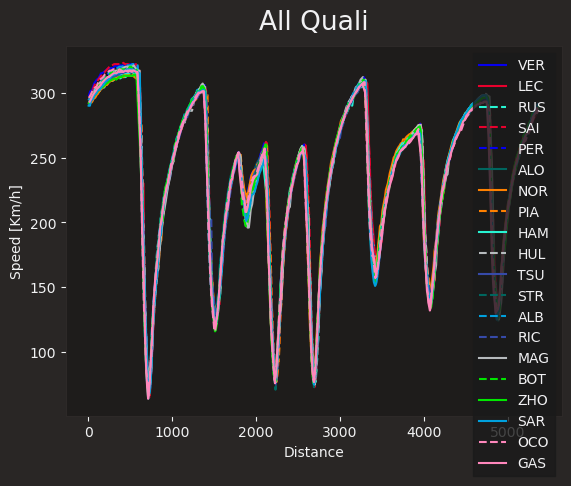

'\nfor drv in session_bahrain_2024_Q.drivers[:5]:\n    drv_laps = session_bahrain_2024_Q.laps.pick_drivers(drv)\n    drv_laps[\'LapTimeSeconds\'] = drv_laps[\'LapTime\'].dt.total_seconds()\n    abb = drv_laps[\'Driver\'].iloc[0]\n\n    pit_laps = drv_laps[drv_laps[\'PitInTime\'].notnull()][\'LapNumber\']\n    accurate_laps = drv_laps[drv_laps[\'IsAccurate\']]\n    style = fastf1.plotting.get_driver_style(identifier=abb, style=[\'color\', \'linestyle\'], session=session_bahrain_2024)\n    ax.plot(accurate_laps[\'LapNumber\'], accurate_laps["LapTimeSeconds"], label=abb, **style)'

In [11]:
# get quali data first
session_bahrain_2024_Q = fastf1.get_session(2024, "Bahrain", "Q")
session_bahrain_2024_Q.load()
session_results = {}
for driver in session_bahrain_2024_Q.drivers:
    try:
        abb = session_bahrain_2024_Q.laps.pick_drivers(driver)['Driver'].iloc[0]
        driver_fastest = session_bahrain_2024_Q.laps.pick_drivers(driver).pick_fastest()
        driver_fastest = driver_fastest.get_car_data().add_distance()
        t = driver_fastest['Distance']
        vCar = driver_fastest["Speed"]
        session_results[abb] = [t, vCar]
    except:
        print("no data", driver)
   
fig, ax1 = plt.subplots()

for key in session_results.keys():
    data = session_results[key]

    style = fastf1.plotting.get_driver_style(identifier=key, style=['color', 'linestyle'], session=session_bahrain_2024_Q)
    ax1.plot(data[0], data[1], label=key, **style)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('All Quali')
ax1.legend()
plt.show()     
'''
for drv in session_bahrain_2024_Q.drivers[:5]:
    drv_laps = session_bahrain_2024_Q.laps.pick_drivers(drv)
    drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
    abb = drv_laps['Driver'].iloc[0]

    pit_laps = drv_laps[drv_laps['PitInTime'].notnull()]['LapNumber']
    accurate_laps = drv_laps[drv_laps['IsAccurate']]
    style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
    ax.plot(accurate_laps['LapNumber'], accurate_laps["LapTimeSeconds"], label=abb, **style)'''


/opt/anaconda3/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/284415333.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


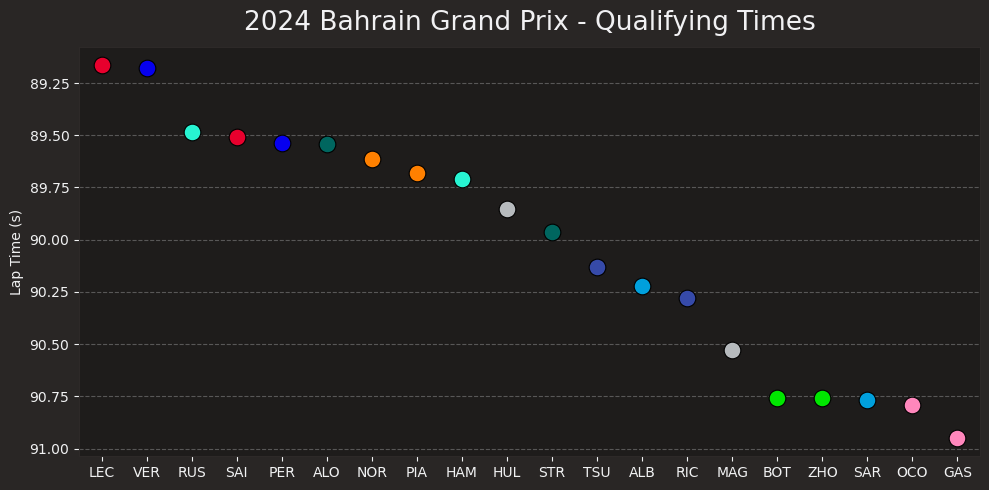

In [12]:
# get quali data first
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
laps = session_bahrain_2024_Q.laps

fastest_laps = laps.loc[laps.groupby('Driver')['LapTime'].idxmin()]

fastest_laps = fastest_laps.copy() 
fastest_laps['LapTimeSeconds'] = fastest_laps['LapTime'].dt.total_seconds()
fastest_laps = fastest_laps.sort_values(by='LapTimeSeconds')

fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('dark_background')
driver_colors = {
    driver: fastf1.plotting.get_driver_color(driver, session_bahrain_2024_Q)
    for driver in fastest_laps['Driver']
}
sns.stripplot(
    x='Driver',
    y='LapTimeSeconds',
    data=fastest_laps, 
    size=12,
    marker='o',
    edgecolor='black',
    linewidth=0.8,
    ax=ax,
    jitter=False, # This keeps all points on a perfect vertical line
    palette=driver_colors
)

ax.set_title(f"{session_bahrain_2024_Q.event.year} {session_bahrain_2024_Q.event.EventName} - Qualifying Times")
ax.set_ylabel('Lap Time (s)')
ax.set_xlabel('') # We don't need an x-axis label

# Invert y-axis to have the fastest time at the top
ax.invert_yaxis()

# Add grid lines for easier comparison
ax.grid(which='major', axis='y', linestyle='--', color='gray', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
fastest_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
28,0 days 00:53:32.342000,LEC,16,0 days 00:01:29.165000,12.0,5.0,NaT,NaT,0 days 00:00:28.843000,0 days 00:00:38.059000,...,Ferrari,0 days 00:52:03.177000,2024-03-01 16:38:38.850,1,NaN,False,,False,True,89.165
15,0 days 01:14:03.304000,VER,1,0 days 00:01:29.179000,16.0,6.0,NaT,NaT,0 days 00:00:28.535000,0 days 00:00:38.269000,...,Red Bull Racing,0 days 01:12:34.125000,2024-03-01 16:59:09.798,1,NaN,False,,False,True,89.179
51,0 days 01:13:47.498000,RUS,63,0 days 00:01:29.485000,16.0,6.0,NaT,NaT,0 days 00:00:28.800000,0 days 00:00:38.421000,...,Mercedes,0 days 01:12:18.013000,2024-03-01 16:58:53.686,1,NaN,False,,False,True,89.485
69,0 days 01:14:26.286000,SAI,55,0 days 00:01:29.507000,17.0,6.0,NaT,NaT,0 days 00:00:28.850000,0 days 00:00:38.298000,...,Ferrari,0 days 01:12:56.779000,2024-03-01 16:59:32.452,1,NaN,False,,False,True,89.507
86,0 days 01:14:33.657000,PER,11,0 days 00:01:29.537000,16.0,6.0,NaT,NaT,0 days 00:00:28.804000,0 days 00:00:38.323000,...,Red Bull Racing,0 days 01:13:04.120000,2024-03-01 16:59:39.793,1,NaN,False,,False,True,89.537
100,0 days 01:10:15.243000,ALO,14,0 days 00:01:29.542000,13.0,5.0,NaT,NaT,0 days 00:00:28.830000,0 days 00:00:38.236000,...,Aston Martin,0 days 01:08:45.701000,2024-03-01 16:55:21.374,1,NaN,False,,False,True,89.542
115,0 days 01:12:44.247000,NOR,4,0 days 00:01:29.614000,14.0,6.0,NaT,NaT,0 days 00:00:29.045000,0 days 00:00:38.207000,...,McLaren,0 days 01:11:14.633000,2024-03-01 16:57:50.306,1,NaN,False,,False,True,89.614
133,0 days 01:12:33.501000,PIA,81,0 days 00:01:29.683000,17.0,6.0,NaT,NaT,0 days 00:00:28.901000,0 days 00:00:38.343000,...,McLaren,0 days 01:11:03.818000,2024-03-01 16:57:39.491,1,NaN,False,,False,True,89.683
151,0 days 01:13:53.867000,HAM,44,0 days 00:01:29.710000,17.0,6.0,NaT,NaT,0 days 00:00:28.881000,0 days 00:00:38.422000,...,Mercedes,0 days 01:12:24.157000,2024-03-01 16:58:59.830,1,NaN,False,,False,True,89.710
163,0 days 00:52:11.933000,HUL,27,0 days 00:01:29.851000,11.0,4.0,NaT,NaT,0 days 00:00:28.834000,0 days 00:00:38.636000,...,Haas F1 Team,0 days 00:50:42.082000,2024-03-01 16:37:17.755,1,NaN,False,,False,True,89.851


/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/3485092335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()


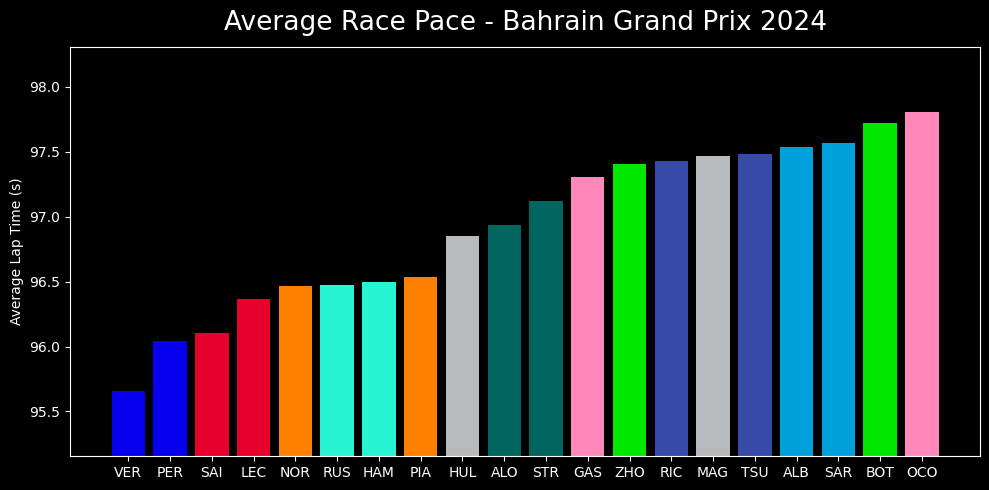

In [14]:
# now time to find avg clean race pace
fastf1.plotting.setup_mpl()
laps = session_bahrain_2024.laps.pick_accurate()
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()

avg_pace = laps.groupby("Driver")['LapTimeSeconds'].mean().reset_index()

avg_pace = avg_pace.sort_values(by='LapTimeSeconds')

driver_colors = [fastf1.plotting.get_driver_color(driver, session=session_bahrain_2024) for driver in avg_pace['Driver']]

fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('dark_background')

ax.bar(
    x=avg_pace['Driver'],
    height=avg_pace['LapTimeSeconds'],
    color=driver_colors
)

ax.set_title(f"Average Race Pace - {session_bahrain_2024.event.EventName} {session_bahrain_2024.event.year}")
ax.set_ylabel("Average Lap Time (s)")

ax.set_ylim(bottom=avg_pace['LapTimeSeconds'].min() - 0.5, top=avg_pace['LapTimeSeconds'].max() + 0.5)

plt.tight_layout()
plt.show()

In [15]:
merged = pd.merge(fastest_laps, avg_pace, on='Driver')
merged = merged.rename(columns={"LapTimeSeconds_x": 'LapTimeSeconds_Q', 'LapTimeSeconds_y': 'LapTimeSeconds_R'})
merged['Differential'] = merged['LapTimeSeconds_R'] - merged['LapTimeSeconds_Q']
merged = merged.sort_values(by='Differential')

/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/3302862698.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


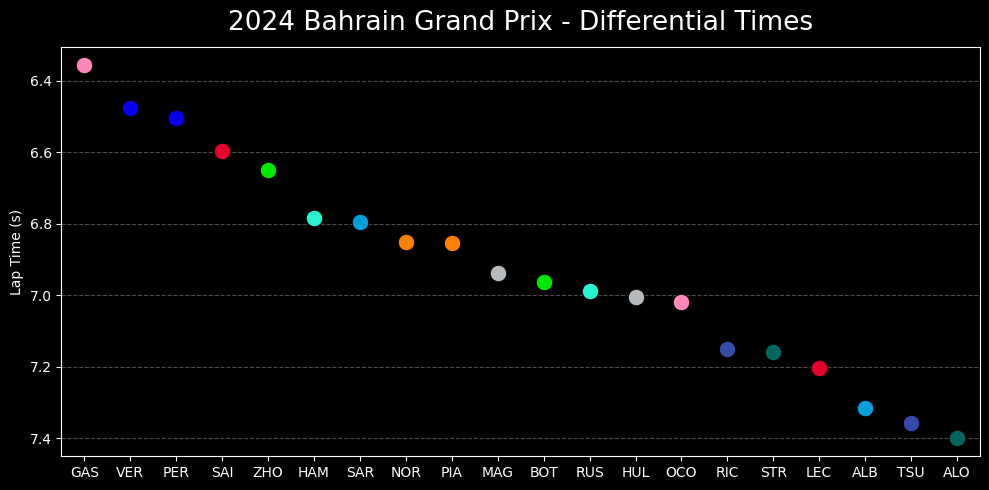

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use('dark_background')
driver_colors = {
    driver: fastf1.plotting.get_driver_color(driver, session_bahrain_2024_Q)
    for driver in fastest_laps['Driver']
}
sns.stripplot(
    x='Driver',
    y='Differential',
    data=merged, 
    size=12,
    marker='o',
    edgecolor='black',
    linewidth=0.8,
    ax=ax,
    jitter=False, # This keeps all points on a perfect vertical line
    palette=driver_colors
)

ax.set_title(f"{session_bahrain_2024_Q.event.year} {session_bahrain_2024_Q.event.EventName} - Differential Times")
ax.set_ylabel('Lap Time (s)')
ax.set_xlabel('') # We don't need an x-axis label

# Invert y-axis to have the fastest time at the top
ax.invert_yaxis()

# Add grid lines for easier comparison
ax.grid(which='major', axis='y', linestyle='--', color='gray', alpha=0.6)
plt.tight_layout()
plt.show()

Assume 0.3 slower per 10kg of fuel
starting with 100 kg and ending with 5? 

0.1 per liter of fuel?

In [17]:
st = fastf1.get_session(2024, 2, "Qualifying")
st.load()
stlaps = st.laps.pick_drivers("VER").pick_fastest()
stlaps

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']


Time                      0 days 01:11:20.403000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:27.472000
LapNumber                                   14.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:31.763000
Sector2Time               0 days 00:00:27.800000
Sector3Time               0 days 00:00:27.909000
Sector1SessionTime        0 days 01:10:24.694000
Sector2SessionTime        0 days 01:10:52.494000
Sector3SessionTime        0 days 01:11:20.403000
SpeedI1                                    294.0
SpeedI2                                    326.0
SpeedFL                                    306.0
SpeedST                                    330.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [19]:
# get all verstappen quali laps from a season

schedule = fastf1.get_event_schedule(2024)
quali_times = {}
for i in range(1, len(schedule)):
    session = fastf1.get_session(2024, i, "Qualifying")
    session.load()
    ver_lap = session.laps.pick_drivers("VER").pick_fastest()
    #print(ver_lap['LapTime'])
    event = schedule['EventName'][i]
    #print(event)
    quali_times[event] = ver_lap['LapTime'].total_seconds()
print(quali_times)
    

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '

{'Austrian Grand Prix': 89.179, 'British Grand Prix': 87.472, 'Hungarian Grand Prix': 75.915, 'Belgian Grand Prix': 88.197, 'Dutch Grand Prix': 93.66, 'Italian Grand Prix': 87.241, 'Azerbaijan Grand Prix': 74.746, 'Singapore Grand Prix': 70.567, 'United States Grand Prix': 72.0, 'Mexico City Grand Prix': 71.403, 'São Paulo Grand Prix': 64.314, 'Las Vegas Grand Prix': 86.203, 'Qatar Grand Prix': 75.273, 'Abu Dhabi Grand Prix': 113.159}


/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/1171203343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/1171203343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['fuel_load'] = np.arange(lap_count, 0, -1) * fuel_per_lap
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_59015/1171203343.py:11: SettingWithCopyWarning: 
A value is t

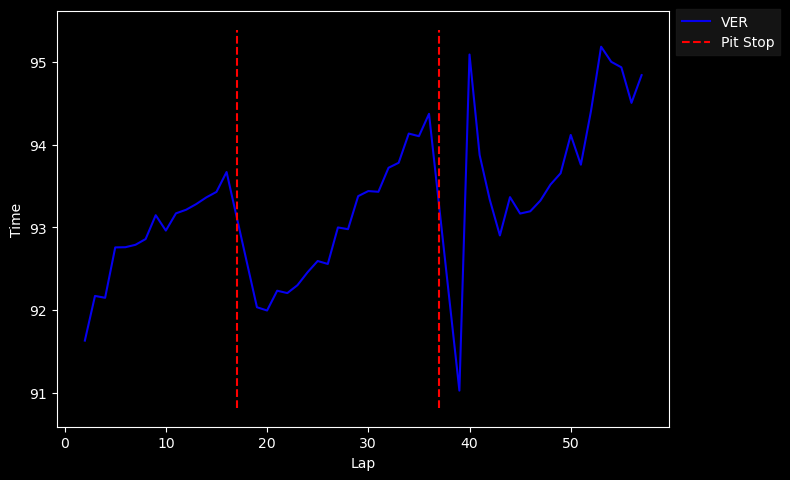

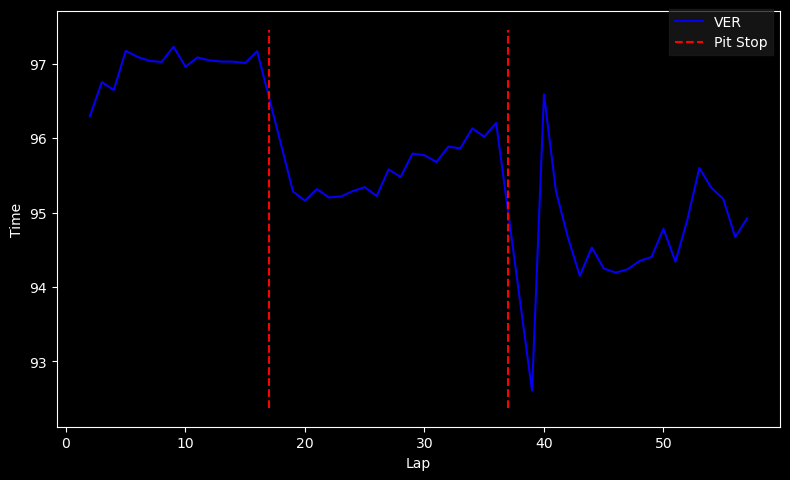

In [21]:
# want to just plot lap times adjusted for fuel load
fig, ax = plt.subplots(figsize=(8.0, 4.9))
drv = "VER"
drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
lap_count = len(drv_laps)
# losing 95 kg over the race
fuel_per_lap = 95 / lap_count
fuel_pace_adjustment = 0.03 * fuel_per_lap
drv_laps['fuel_load'] = np.arange(lap_count, 0, -1) * fuel_per_lap
drv_laps['LapTimeAdjusted'] = drv_laps['LapTimeSeconds'] - (drv_laps['fuel_load'] * fuel_pace_adjustment)
abb = drv_laps['Driver'].iloc[0]

accurate_laps = drv_laps[drv_laps['IsAccurate'] == True]
pit_laps = drv_laps[drv_laps['PitInTime'].notnull()]['LapNumber']

style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
ax.plot(accurate_laps['LapNumber'], accurate_laps["LapTimeAdjusted"], label=abb, **style)

ymin, ymax = ax.get_ylim()
ax.vlines(x=pit_laps, ymin=ymin, ymax=ymax, color='red', lw=1.5, linestyle='--', label='Pit Stop')
ax.set_xlabel('Lap')
ax.set_ylabel('Time')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()
fig, ax = plt.subplots(figsize=(8.0, 4.9))
style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
ax.plot(accurate_laps['LapNumber'], accurate_laps["LapTimeSeconds"], label=abb, **style)

ymin, ymax = ax.get_ylim()
ax.vlines(x=pit_laps, ymin=ymin, ymax=ymax, color='red', lw=1.5, linestyle='--', label='Pit Stop')
ax.set_xlabel('Lap')
ax.set_ylabel('Time')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

Now this looks like there's some tire deg

In [ ]:
def adjust_lap_times_for_fuel_load(lap_times, total_fuel_load=95, fuel_pace_adjustment=0.03):
    lap_count = len(lap_times)
    fuel_per_lap = total_fuel_load / lap_count
    fuel_loads = np.arange(lap_count, 0, -1) * fuel_per_lap
    adjusted_lap_times = lap_times - (fuel_loads * fuel_pace_adjustment)
    return adjusted_lap_times

Things to account for still: 
dirty air - how far in front the next driver is based on time? maybe idk if that works or not 
temperature - obviously I can't account probably for every lap but can get an overall track temp for the session (will just ignore wet sessions)
tyre compounds - can't compare tire deg from softs and hards, could also need to account for warm up times but ignoring out laps should fix that

side note: ['TyreLife'] keeps track of how old the tyres are
['FreshTyre'] can be ignored, just check if their first lap on the tyre is 2 or not

In [23]:
accurate_laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapTimeSeconds', 'fuel_load',
       'LapTimeAdjusted'],
      dtype='object')

In [48]:
# calculate time differentials between cars so I can account for dirty air (at some point which might not even be necessary)
laps = session_bahrain_2024.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
car_ahead = laps[['LapStartTime', 'Position', 'LapNumber', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime']].copy()
car_ahead

,LapStartTime,Position,LapNumber,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime
0,0 days 00:59:59.911000,1.0,1.0,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000
1,0 days 01:01:37.489000,1.0,2.0,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000
2,0 days 01:03:13.785000,1.0,3.0,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000
3,0 days 01:04:50.538000,1.0,4.0,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000
4,0 days 01:06:27.185000,1.0,5.0,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000
...,...,...,...,...,...,...
1124,0 days 02:24:01.863000,20.0,51.0,0 days 02:24:32.668000,0 days 02:25:14.207000,0 days 02:25:37.859000
1125,0 days 02:25:37.835000,20.0,52.0,0 days 02:26:08.634000,0 days 02:26:50.074000,0 days 02:27:13.846000
1126,0 days 02:27:13.822000,20.0,53.0,0 days 02:27:44.644000,0 days 02:28:26.254000,0 days 02:28:49.934000
1127,0 days 02:28:49.910000,20.0,54.0,0 days 02:29:22.113000,0 days 02:30:05.861000,0 days 02:30:29.548000


In [49]:
car_ahead['MergeKey'] = car_ahead['Position'] + 1
car_ahead.rename(columns={'LapStartTime': 'Start_Ahead', 'Sector1SessionTime': 'S1_Ahead', 'Sector2SessionTime': 'S2_Ahead', 'Sector3SessionTime': 'S3_Ahead'}, inplace=True)
car_ahead

,Start_Ahead,Position,LapNumber,S1_Ahead,S2_Ahead,S3_Ahead,MergeKey
0,0 days 00:59:59.911000,1.0,1.0,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,2.0
1,0 days 01:01:37.489000,1.0,2.0,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,2.0
2,0 days 01:03:13.785000,1.0,3.0,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000,2.0
3,0 days 01:04:50.538000,1.0,4.0,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000,2.0
4,0 days 01:06:27.185000,1.0,5.0,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000,2.0
...,...,...,...,...,...,...,...
1124,0 days 02:24:01.863000,20.0,51.0,0 days 02:24:32.668000,0 days 02:25:14.207000,0 days 02:25:37.859000,21.0
1125,0 days 02:25:37.835000,20.0,52.0,0 days 02:26:08.634000,0 days 02:26:50.074000,0 days 02:27:13.846000,21.0
1126,0 days 02:27:13.822000,20.0,53.0,0 days 02:27:44.644000,0 days 02:28:26.254000,0 days 02:28:49.934000,21.0
1127,0 days 02:28:49.910000,20.0,54.0,0 days 02:29:22.113000,0 days 02:30:05.861000,0 days 02:30:29.548000,21.0


In [50]:
laps = laps.merge(car_ahead, left_on=['Position', 'LapNumber'], right_on=['MergeKey', 'LapNumber'], how='left')
laps['Gap_start'] = laps['LapStartTime'] - laps['Start_Ahead']
laps['S1_gap'] = laps['Sector1SessionTime'] - laps['S1_Ahead']
laps['S2_gap'] = laps['Sector2SessionTime'] - laps['S2_Ahead']
laps['S3_gap'] = laps['Sector3SessionTime'] - laps['S3_Ahead']
laps['AvgGap'] = (laps['S1_gap'] + laps['S2_gap'] + laps['S3_gap']) / 3
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position_y,S1_Ahead,S2_Ahead,S3_Ahead,MergeKey,Gap_start,S1_gap,S2_gap,S3_gap,AvgGap
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,NaN,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.835000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,...,19.0,0 days 02:23:54.161000,0 days 02:24:36.097000,0 days 02:24:59.961000,20.0,0 days 00:00:38.737000,0 days 00:00:38.507000,0 days 00:00:38.110000,0 days 00:00:37.898000,0 days 00:00:38.171666666
1125,0 days 02:27:13.822000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,...,19.0,0 days 02:25:30.958000,0 days 02:26:12.938000,0 days 02:26:36.910000,20.0,0 days 00:00:37.890000,0 days 00:00:37.676000,0 days 00:00:37.136000,0 days 00:00:36.936000,0 days 00:00:37.249333333
1126,0 days 02:28:49.910000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,...,19.0,0 days 02:27:07.889000,0 days 02:27:50.017000,0 days 02:28:15.945000,20.0,0 days 00:00:36.928000,0 days 00:00:36.755000,0 days 00:00:36.237000,0 days 00:00:33.989000,0 days 00:00:35.660333333
1127,0 days 02:30:29.524000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,...,19.0,0 days 02:28:46.650000,0 days 02:29:28.942000,0 days 02:29:53.040000,20.0,0 days 00:00:33.981000,0 days 00:00:35.463000,0 days 00:00:36.919000,0 days 00:00:36.508000,0 days 00:00:36.296666666


In [54]:
laps[laps['Driver'] == 'LEC']

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position_y,S1_Ahead,S2_Ahead,S3_Ahead,MergeKey,Gap_start,S1_gap,S2_gap,S3_gap,AvgGap
171,0 days 01:01:38.476000,LEC,16,0 days 00:01:38.271000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.549000,...,1.0,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,2.0,0 days 00:00:00,NaT,0 days 00:00:01.062000,0 days 00:00:00.920000,NaT
172,0 days 01:03:15.338000,LEC,16,0 days 00:01:36.862000,2.0,1.0,NaT,NaT,0 days 00:00:31.166000,0 days 00:00:41.864000,...,1.0,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,2.0,0 days 00:00:00.987000,0 days 00:00:01.216000,0 days 00:00:01.419000,0 days 00:00:01.532000,0 days 00:00:01.389000
173,0 days 01:04:53.400000,LEC,16,0 days 00:01:38.062000,3.0,1.0,NaT,NaT,0 days 00:00:31.223000,0 days 00:00:42.856000,...,2.0,0 days 01:03:46.460000,0 days 01:04:28.662000,0 days 01:04:52.499000,3.0,-1 days +23:59:59.270000,0 days 00:00:00.101000,0 days 00:00:00.755000,0 days 00:00:00.901000,0 days 00:00:00.585666666
174,0 days 01:06:31.152000,LEC,16,0 days 00:01:37.752000,4.0,1.0,NaT,NaT,0 days 00:00:30.958000,0 days 00:00:42.784000,...,2.0,0 days 01:05:23.634000,0 days 01:06:06.243000,0 days 01:06:30.237000,3.0,0 days 00:00:00.926000,0 days 00:00:00.724000,0 days 00:00:00.899000,0 days 00:00:00.915000,0 days 00:00:00.846000
175,0 days 01:08:09.283000,LEC,16,0 days 00:01:38.131000,5.0,1.0,NaT,NaT,0 days 00:00:31.192000,0 days 00:00:42.872000,...,2.0,0 days 01:07:01.873000,0 days 01:07:44.446000,0 days 01:08:08.353000,3.0,0 days 00:00:00.940000,0 days 00:00:00.471000,0 days 00:00:00.770000,0 days 00:00:00.930000,0 days 00:00:00.723666666
176,0 days 01:09:47.065000,LEC,16,0 days 00:01:37.782000,6.0,1.0,NaT,NaT,0 days 00:00:30.936000,0 days 00:00:42.751000,...,2.0,0 days 01:08:39.713000,0 days 01:09:22.221000,0 days 01:09:46.137000,3.0,0 days 00:00:00.955000,0 days 00:00:00.506000,0 days 00:00:00.749000,0 days 00:00:00.928000,0 days 00:00:00.727666666
177,0 days 01:11:26.022000,LEC,16,0 days 00:01:38.957000,7.0,1.0,NaT,NaT,0 days 00:00:31.008000,0 days 00:00:43.761000,...,3.0,0 days 01:10:18.720000,0 days 01:11:01.402000,0 days 01:11:25.528000,4.0,-1 days +23:59:59.380000,-1 days +23:59:59.353000,0 days 00:00:00.432000,0 days 00:00:00.494000,0 days 00:00:00.093000
178,0 days 01:13:04.158000,LEC,16,0 days 00:01:38.136000,8.0,1.0,NaT,NaT,0 days 00:00:31.200000,0 days 00:00:42.753000,...,3.0,0 days 01:11:56.833000,0 days 01:12:39.261000,0 days 01:13:03.366000,4.0,0 days 00:00:00.516000,0 days 00:00:00.389000,0 days 00:00:00.714000,0 days 00:00:00.792000,0 days 00:00:00.631666666
179,0 days 01:14:42.002000,LEC,16,0 days 00:01:37.844000,9.0,1.0,NaT,NaT,0 days 00:00:31.147000,0 days 00:00:42.533000,...,3.0,0 days 01:13:34.511000,0 days 01:14:16.906000,0 days 01:14:40.962000,4.0,0 days 00:00:00.814000,0 days 00:00:00.794000,0 days 00:00:00.932000,0 days 00:00:01.040000,0 days 00:00:00.922000
180,0 days 01:16:19.886000,LEC,16,0 days 00:01:37.884000,10.0,1.0,NaT,NaT,0 days 00:00:30.988000,0 days 00:00:42.534000,...,3.0,0 days 01:15:12.140000,0 days 01:15:54.462000,0 days 01:16:18.592000,4.0,0 days 00:00:01.062000,0 days 00:00:00.850000,0 days 00:00:01.062000,0 days 00:00:01.294000,0 days 00:00:01.068666666
